In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from pandas import DataFrame

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from numpy import log
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [34]:

df =pd.read_csv("usage.csv")
df.head()

,x
0,88
1,84
2,85
3,85
4,84


In [35]:
def adfuller_test(sales):
    result=adfuller(sales)
    
    if result[1] <= 0.05:
        print("is stationary")
    else:
        print("is non-stationary ")

In [36]:
adfuller_test(df)

is non-stationary 


In [37]:
df['new_val12']=df['x'] - df['x'].shift(12)

In [38]:
adfuller_test(df['new_val12'].dropna())

is stationary


In [39]:
df.head(20)

,x,new_val12
0,88,NaN
1,84,NaN
2,85,NaN
3,85,NaN
4,84,NaN
5,85,NaN
6,83,NaN
7,85,NaN
8,88,NaN
9,89,NaN


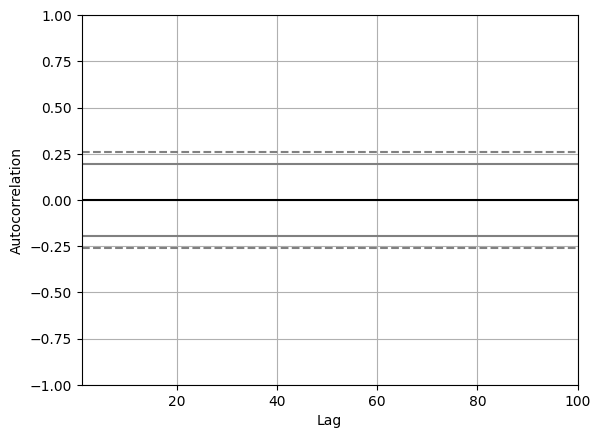

In [40]:
pd.plotting.autocorrelation_plot(df)
plt.show()

In [41]:
import statsmodels.api as sm

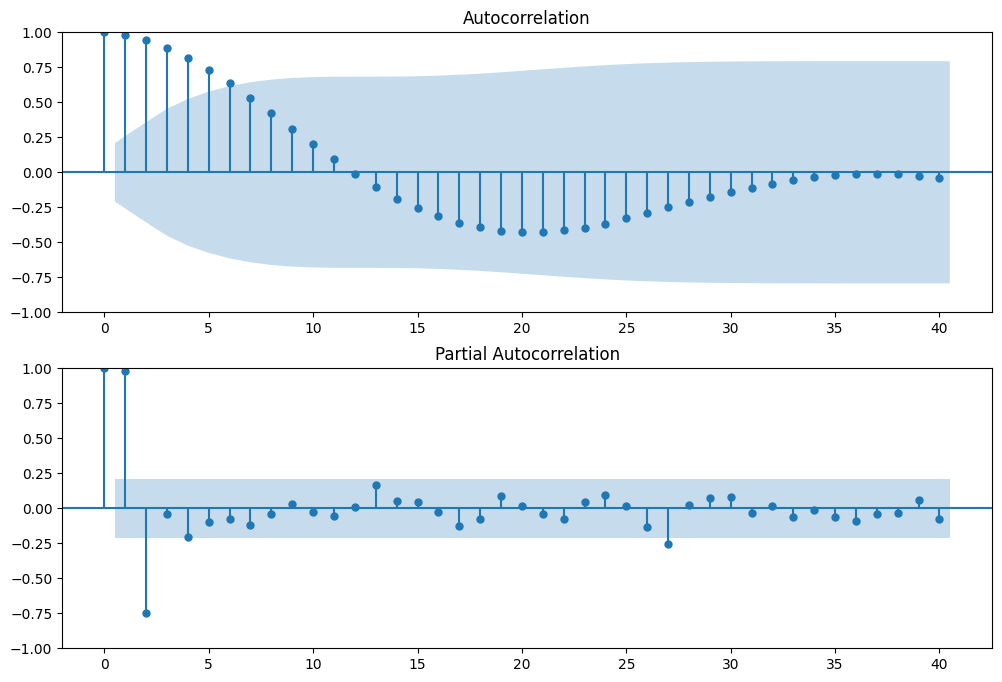

In [42]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['new_val12'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['new_val12'].dropna(),lags=40,ax=ax2)

In [43]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

In [44]:
import warnings

warnings.filterwarnings("ignore")

In [45]:
autoarima_model = auto_arima(df['new_val12'].dropna(), trace=True ,suppress_warnings=True)
print(autoarima_model.summary())

Performing stepwise search to minimize aic


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=509.394, Time=0.70 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=932.371, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=624.488, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=940.607, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=522.836, Time=0.43 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=514.868, Time=0.36 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=509.880, Time=1.18 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.45 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=550.100, Time=0.28 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=523.508, Time=0.73 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=516.231, Time=0.58 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.24 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=508.110, Time=0.38 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=521.340, Time=0.29 sec
 ARIMA(2,0,1)(0,0,0)[0]             :

In [46]:
size = int(len(df) * 0.85)
train = df[:size]
test = df[size:]

In [49]:
print(len(train))
print(len(test))
print(len(df))

85
15
100


In [64]:
model = SARIMAX(train['x'], order=(2,0,4),seasonal_order=(2,0,4,12))  
fitted = model.fit()
print(fitted.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  x   No. Observations:                   85
Model:             SARIMAX(2, 0, 4)x(2, 0, 4, 12)   Log Likelihood                -217.672
Date:                            Thu, 18 Jan 2024   AIC                            461.343
Time:                                    11:28:38   BIC                            493.098
Sample:                                         0   HQIC                           474.116
                                             - 85                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6943      0.186      9.097      0.000       1.329       2.059
ar.L2         -0.6944      0.186   

In [65]:
# Get confidence intervals for the forecasts
forecast_steps = len(test) 
# forecast_results = fitted.get_forecast(steps=forecast_steps)
forecast = fitted.predict(start=len(train), end=len(df)-1,dynamic=True)
# conf_int = forecast_results.conf_int()  # Confidence intervals

In [66]:
abs(test['x']-forecast)

85     0.081627
86     2.468977
87     3.630845
88     4.266714
89     6.951731
90    15.609753
91    25.267566
92    30.546948
93    35.616352
94    43.220532
95    52.940408
96    59.356334
97    58.187644
98    55.918692
99    55.395128
dtype: float64

In [67]:
# lower_series = pd.Series(conf_int['lower value'], index=test.index)
# upper_series = pd.Series(conf_int['upper value'], index=test.index)

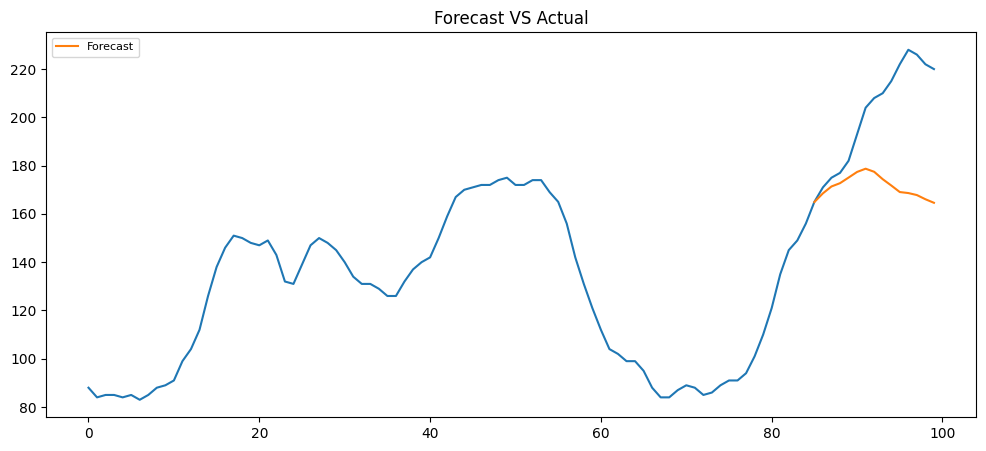

In [68]:
# Plot
plt.figure(figsize=(12,5))
plt.plot(df['x'])
plt.plot(forecast, label='Forecast')
# plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast VS Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Error calculation

In [69]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [70]:
test.mean()

x            201.200000
new_val12     75.933333
dtype: float64

In [71]:
rmse= sqrt(mean_squared_error(forecast,test['x']))
rmse

37.36733843198137

# Future value prediction


In [72]:
future_df=fitted.predict(start=len(df), end=len(df)+20,dynamic=True)
#  20 ta notun index er jnno value forecast korci

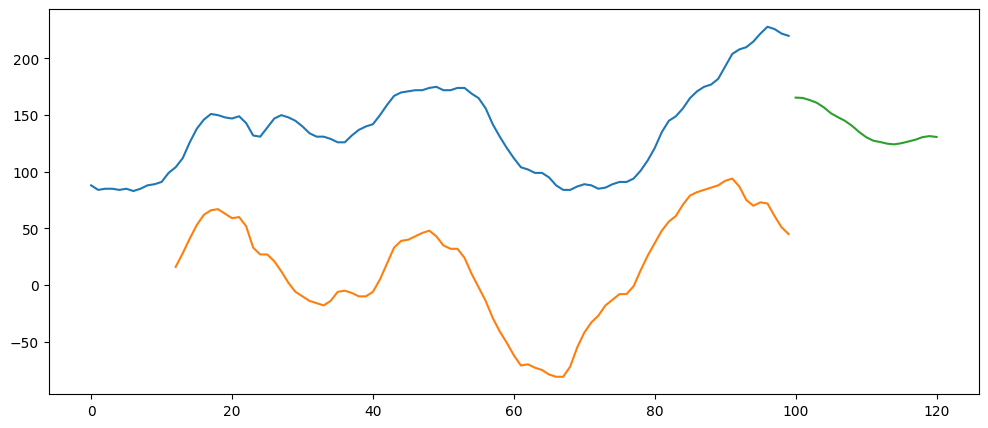

In [73]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df, label='original data')
plt.plot(future_df, label='Forecast')

In [74]:
# forecast_steps = len(test) 
# # forecast_results = fitted.get_forecast(steps=forecast_steps)
# forecast = fitted.forecast(steps=forecast_steps+20) 
# # conf_int = forecast_results.conf_int()

In [75]:
# plt.figure(figsize=(12,5), dpi=100)
# plt.plot(train, label='Training')
# plt.plot(test, label='Actual')
# plt.plot(forecast, label='Forecast')